In [7]:
import pandas as pd
from sklearn.metrics import jaccard_score
from collections import Counter
from itertools import combinations
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]
import re

In [2]:
df = pd.read_csv('human_annotated_PPIs_IID.txt', sep='\t')

In [3]:
cancers = ["breast cancer", "prostate cancer", "stomach cancer", "large intestine cancer", "colorectal cancer", "ovarian cancer", "urinary bladder cancer", "colon cancer", "liver cancer", "thoracic cancer", "intestinal cancer", "lung cancer", "hematologic cancer", "pancreatic cancer", "endocrine gland cancer", "bone marrow cancer"]
data = df[cancers + ['nucleus', 'evidence type', 'drug targets', 'methods']].copy()
data = data.loc[data['evidence type'].str.contains("exp")]
data = data.loc[data['nucleus'] == 1]
data['num_methods'] = data['methods'].apply(lambda x: len(re.findall(';', x)) + 1)
data = data.loc[data['num_methods'] >= 2]
data = data[cancers]

In [4]:
pairs = [i for i in combinations(range(len(data.columns)), 2)]
lst = []
for j in tqdm(pairs, total=len(pairs)):
    
    a = data[data.columns[j[0]]].tolist()
    b = data[data.columns[j[1]]].tolist()

    lst.append([data.columns[j[0]], data.columns[j[1]], jaccard_score(a,b)])

100%|██████████| 120/120 [00:06<00:00, 17.30it/s]


In [5]:
ji = pd.DataFrame.from_records(lst)
ji.columns = ['cancer1','cancer2','JaccardIndex']

<AxesSubplot:>

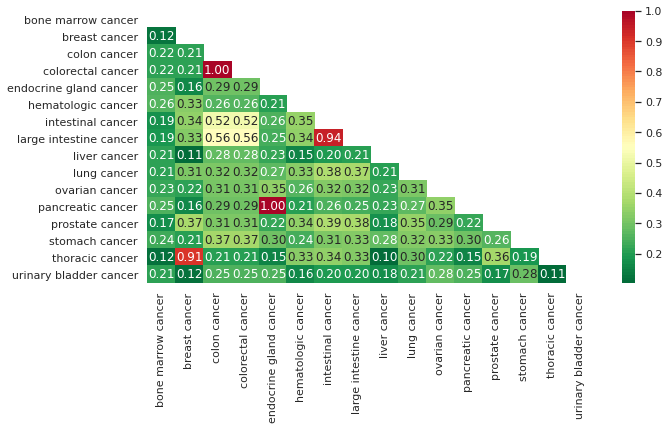

In [8]:
mat = ji.pivot(index='cancer1', columns='cancer2', values='JaccardIndex')
mat = mat.combine_first(mat.T)
np.fill_diagonal(mat.to_numpy(), 0)

sns.set(style='white')
mask = np.triu(np.ones_like(mat))
custom_palette = sns.color_palette("RdYlGn_r", n_colors=100)
sns.heatmap(mat, mask=mask, cmap=custom_palette, annot=True, fmt='.2f')